## Data Assessment of Waterflow Historical Data

**Metadata Summary**  
- 📅 **Date of Retrieval:** JULY 1, 2025  
- 🌐 **Source of Data:** LGU San Jacinto Treasury Records
- 📄 **License/Permission:**  
- 🧑‍💼 **Prepared by:** MARK JUNE E. ALMOJUELA

# Overview of the Datasets

In [1]:
# Initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
# Dataset Availability and Compatibility Check

data_dir_path = "../../dataset/raw/"
try:
    years = [year for year in os.listdir(data_dir_path) if os.path.isdir(os.path.join(data_dir_path, year))]
    print("Available years: ", years, '\n')

    # List xlsx files in the directory
    for year in years:
        csv_files = [f for f in os.listdir(f'{data_dir_path}{year}') if f.endswith(".csv")]
        print(f"{year}: {csv_files}; \nCOUNT: {len(csv_files)}")
except FileNotFoundError:
    print("Directory not found")
except NotADirectoryError:
    print("Path is not a directory")
except PermissionError:
    print("Permission denied")
except Exception as e:
    print(f"An error occurred: {e}")

Available years:  ['2020', '2021', '2022', '2023', '2024', '2025'] 

2020: ['APR2020.csv', 'AUG2020.csv', 'DEC2020.csv', 'FEB2020.csv', 'JAN2020.csv', 'JUL2020.csv', 'JUN2020.csv', 'MAR2020.csv', 'MAR_APR2020.csv', 'MAY2020.csv', 'NOV2020.csv', 'OCT2020.csv', 'SEP2020.csv']; 
COUNT: 13
2021: []; 
COUNT: 0
2022: ['APR2022.csv', 'DEC2022.csv', 'FEB2022.csv', 'JAN2022.csv', 'JUL2022.csv', 'JUN2022.csv', 'MAR2022.csv', 'MAY2022.csv', 'NOV2022.csv', 'OCT2022.csv']; 
COUNT: 10
2023: ['APR2023.csv', 'AUG2023.csv', 'DEC2023.csv', 'FEB2023.csv', 'JAN2023.csv', 'JUL2023.csv', 'JUN2023.csv', 'MAR2023.csv', 'MAY2023.csv', 'OCT2023.csv', 'SEP2023.csv']; 
COUNT: 11
2024: ['APR2024.csv', 'FEB2024.csv', 'JAN2024.csv', 'JUN2024.csv', 'MAR2024.csv', 'MAY2024.csv']; 
COUNT: 6
2025: []; 
COUNT: 0


In [4]:
import os
import pandas as pd
from datetime import datetime

# ANSI styles for terminal color
HEADER = "\033[95m"
OKBLUE = "\033[94m"
OKGREEN = "\033[92m"
WARNING = "\033[93m"
FAIL = "\033[91m"
RESET = "\033[0m"
BOLD = "\033[1m"

def extract_date(filename):
    try:
        base = os.path.splitext(filename)[0]  
        month_str = base[:3].upper()  
        year_str = base[-4:]  
        date = datetime.strptime(f"{month_str} {year_str}", "%b %Y")
        return date
    except Exception as e:
        print(f"Warning: Could not parse date from {filename}: {e}")
        return datetime.max  # Put problematic files at the end

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Input and path setup
year = input("📅 Enter year: ")
data_dir_path = f"../../dataset/raw/{year}/"

# File discovery
csv_files = [f for f in os.listdir(data_dir_path) if f.endswith(".csv")]

# Sort files by month
csv_files.sort(key=extract_date)

duplicate_control_number_trend = []
duplicate_serial_number_trend = []
duplicate_installation_trend = []

for csv_file in csv_files:
    print(f"\n{BOLD}{OKGREEN}📂 Processing File: {csv_file}{RESET}")
    
    file_path = os.path.join(data_dir_path, csv_file)
    df = pd.read_csv(file_path, encoding='latin-1')

    print(f"{OKBLUE}📌 Shape:{RESET} {df.shape}")
    print(f"{OKBLUE}🧾 Columns:{RESET} {df.columns.tolist()}")
    print(f"{OKBLUE}🔍 Data Types:{RESET}\n{df.dtypes}")
    print(f"{OKBLUE}❓ Missing Values:{RESET}\n{df.isnull().sum()}")
    print(f"{OKBLUE}📊 Descriptive Stats:{RESET}\n{df.describe(include='all')}")
    print(f"{WARNING}Duplicated Records:{RESET} {df.duplicated().sum()}")
    print(f"{WARNING}Duplicated Consumer Name:{RESET} {df.duplicated('Consumer\'s Name').sum()}")

    duplicated_control_number = df.duplicated('Control Number').sum()
    duplicated_serial_number = df.duplicated('Water Meter Serial #').sum()
    duplicated_installation = df.duplicated(['Address', 'Consumer\'s Name', 'Control Number', 'Water Meter Serial #']).sum()
    
    duplicate_control_number_trend.append(duplicated_control_number)
    duplicate_serial_number_trend.append(duplicated_serial_number)
    duplicate_installation_trend.append(duplicated_installation)

    print(f"{WARNING}Duplicated Control Number:{RESET} {duplicated_control_number}")
    print(f"{WARNING}Duplicated Water Meter Serial Number:{RESET} {duplicated_serial_number}")
    print(f"{WARNING}Duplicated Installation:{RESET} {duplicated_installation}")
    
    print(f"{OKBLUE}👀 Sample Data:{RESET}")
    print(df.head())
    
    print(f"{OKBLUE}🧠 Info Summary:{RESET}")
    df.info()


📂 Processing File: JAN2020.csv
📌 Shape: (1579, 8)
🧾 Columns: ['Control Number', "Consumer's Name", 'Address', 'Water Meter Serial #', 'Previous', 'Present', 'Cons.', 'Amount']
🔍 Data Types:
Control Number          float64
Consumer's Name          object
Address                  object
Water Meter Serial #     object
Previous                 object
Present                  object
Cons.                    object
Amount                   object
dtype: object
❓ Missing Values:
Control Number            7
Consumer's Name           0
Address                   0
Water Meter Serial #    642
Previous                160
Present                 241
Cons.                   539
Amount                  379
dtype: int64
📊 Descriptive Stats:
        Control Number Consumer's Name    Address Water Meter Serial #  \
count      1572.000000            1579       1579                  937   
unique             NaN            1511         24                  910   
top                NaN  Dejumo, Sergia  J

C:\Users\Mark June Almojuela\AppData\Local\Temp\ipykernel_20168\336321721.py:30: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Mark June Almojuela\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


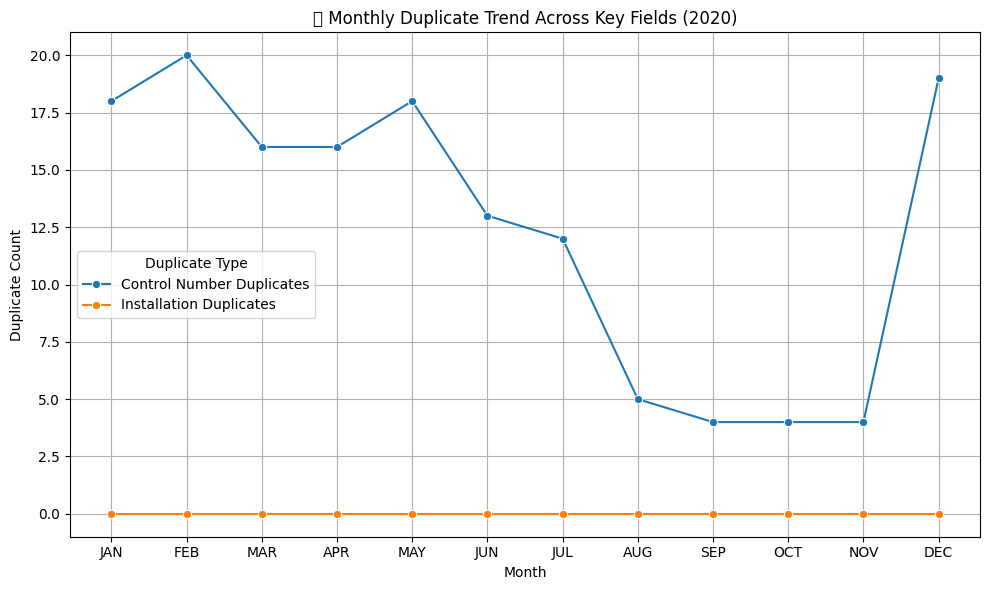

In [81]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Suppose these are results across months
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# Construct the DataFrame
trend_df = pd.DataFrame({
    "Month": months,
    "Control Number Duplicates": duplicate_control_number_trend,
    # "Serial Number Duplicates": duplicate_serial_number_trend,
    "Installation Duplicates": duplicate_installation_trend
})

# Melt for seaborn
melted_df = trend_df.melt(id_vars="Month", 
                          value_vars=["Control Number Duplicates", 
                                    #   "Serial Number Duplicates", 
                                      "Installation Duplicates"],
                          var_name="Duplicate Type", value_name="Count")

# 📈 Seaborn line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x="Month", y="Count", hue="Duplicate Type", marker="o")
plt.title(f"📉 Monthly Duplicate Trend Across Key Fields ({year})")
plt.xlabel("Month")
plt.ylabel("Duplicate Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Duplicate value anomaly

In [54]:
year = "2020"
month = "JUN"
column_name = "Water Meter Serial #"
data_dir_path = f"../../dataset/raw/{year}/"

# File discovery
raw_df = pd.read_csv(os.path.join(data_dir_path, f"{month}{year}.csv"), encoding='latin-1')
test_df = raw_df.dropna(subset=[column_name])

# Show all instances of duplicates (including the first occurrence)
duplicates_mask = test_df[column_name].duplicated(keep=False)  # keep=False marks all duplicates as True
all_duplicates = test_df[duplicates_mask].sort_values(column_name)
all_duplicates

,Control Number,Consumer's Name,Address,Water Meter Serial #,Previous,Present,Cons.,Amount
788,500088.0,"Granado, Nelly",Esparrago St.,017002-02,2341,2355,14.0,84
733,500502.0,"Almocera, Cesar",Esparrago St.,017002-02,2424,2424,NaN,60
156,500118.0,"Abejero, Ernesto Jr.",Altarejos St.,017147-02,6353,6382,29.0,174
221,500620.0,"Rejuso, Janeth",Altarejos St.,017147-02,6921,6924,3.0,60
1059,500337.0,"Belmes, Nila",Gutierrez St.,017738-02,4835,4905,70.0,420
925,500305.0,"Gutierrez, Helen",Fabmar St.,017738-02,2388,2422,34.0,204
730,500668.0,"Villahermosa, Evan",Don Juan St.,017927-02,458,DEFECT,NaN,60
686,500661.0,"Almonte, Carlos",Don Juan St.,017927-02,DISC.,DISC.,NaN,NaN
863,500331.0,"Bartolata, Eusebio",Fabmar St.,027458-02,4569,4590,21.0,126
322,500371.0,"Aruc, Grace",Bailon St.,027458-02,1044,1056,12.0,72


In [55]:
year = "2020"
month = "JUN"
column_name = "Control Number"
data_dir_path = f"../../dataset/raw/{year}/"

# File discovery
raw_df = pd.read_csv(os.path.join(data_dir_path, f"{month}{year}.csv"), encoding='latin-1')
test_df = raw_df.dropna(subset=[column_name])

# Show all instances of duplicates (including the first occurrence)
duplicates_mask = test_df[column_name].duplicated(keep=False)  # keep=False marks all duplicates as True
all_duplicates = test_df[duplicates_mask].sort_values(column_name)
all_duplicates

,Control Number,Consumer's Name,Address,Water Meter Serial #,Previous,Present,Cons.,Amount
1595,500134.0,"Sola, Manuel",Moyot St.,NaN,2311,2327,16.0,96
1389,500134.0,"Sola, Manuel",Letada St.,028455-02,DISC.,DISC.,NaN,NaN
746,500593.0,"Almonte, Edgar",Esparrago St.,121537,NaN,NaN,NaN,NaN
1337,500593.0,"Almonte, Edgar Sr.",Letada St.,NaN,2952,2964,12.0,72
1242,500701.0,"Genova, Noemi",Jones St.,11195,DISC.,DISC.,NaN,NaN
483,500701.0,"Genova, Noemi",Balcavem St.,NaN,133,145,12.0,72
318,500756.0,"Altiche, Lolita",Bailon St.,2200103,5248,5314,66.0,396
809,500756.0,"Orteza, Blas",Esparrago St.,NaN,DISC.,DISC.,NaN,NaN
1132,500849.0,"Barsaga, Josefa A",Jones St.,NaN,DISC.,DISC.,NaN,NaN
1113,500849.0,"Anos, Benito",Jones St.,017982-02,1767,1783,16.0,96


# Invalid Readings and Consumption Values

In [ ]:
year = "2020"
month = "APR"
column_name = "Previous"
data_dir_path = f"../../dataset/raw/{year}/"

# File discovery
raw_df = pd.read_csv(os.path.join(data_dir_path, f"{month}{year}.csv"), encoding='latin-1')
test_df = raw_df.dropna(subset=[column_name])
test_df[column_name] = pd.to_numeric(test_df[column_name], errors='coerce')
test_df = test_df[test_df[column_name] != np.nan]

invalid_readings = test_df[test_df[column_name] <= 0]
invalid_readings

# Address Assessment

In [ ]:
year = "2020"
month = "APR"
column_name = "Previous"
data_dir_path = f"../../dataset/raw/{year}/"



# Negative consumption difference anomalies

In [83]:
# Review of consumption difference
july_df = pd.read_csv("../../dataset/raw/2020/JUL2020.csv", encoding='latin-1')
oct_df = pd.read_csv("../../dataset/raw/2020/OCT2020.csv", encoding='latin-1')

july_df['Present'] = pd.to_numeric(july_df['Present'], errors='coerce')
oct_df['Present'] = pd.to_numeric(oct_df['Present'], errors='coerce')

july_mini_df = july_df[['Control Number', 'Consumer\'s Name', 'Previous', 'Present']]
oct_mini_df = oct_df[['Control Number', 'Consumer\'s Name', 'Previous', 'Present']]

merged_df = pd.merge(july_mini_df, oct_mini_df, on=['Control Number', 'Consumer\'s Name'], suffixes=('_july', '_oct'))

merged_df['Consumption Difference'] = pd.to_numeric(merged_df['Present_oct']) - pd.to_numeric(merged_df['Present_july'])
display(merged_df.head())

negative_df = merged_df[merged_df['Consumption Difference'] < 0]
print("Negative Consumption Difference Count: ", len(negative_df))
display(negative_df.head())


,Control Number,Consumer's Name,Previous_july,Present_july,Previous_oct,Present_oct,Consumption Difference
0,501549,"Albaño, Lilane",275,286.0,306,312.0,26.0
1,500750,"Aljecera, Marcelino",3077,3086.0,3110,3114.0,28.0
2,500990,"Almiñana, Irus",592,619.0,671,698.0,79.0
3,500505,"Almiñe, Edison",NaN,17.0,255,291.0,274.0
4,501542,"Almiñe, Filben",3369,3401.0,3480,3509.0,108.0


Negative Consumption Difference Count:  8


,Control Number,Consumer's Name,Previous_july,Present_july,Previous_oct,Present_oct,Consumption Difference
199,500587,"Espinosa, Jerol",3084,3084.0,36,50.0,-3034.0
325,501276,"Barrun, Normelita",426,426.0,34,65.0,-361.0
409,501462,"Rejuso, Rolando",999,999.0,21,27.0,-972.0
482,500114,"Labastida, Maricel",2838,2884.0,2857,2864.0,-20.0
770,501446,"Espinosa, Florence",4212,4418.0,NaN,176.0,-4242.0


# Anomalous bill trend

In [91]:
# Review of consumption difference
july_df = pd.read_csv("../../dataset/raw/2022/JUL2022.csv", encoding='latin-1')
oct_df = pd.read_csv("../../dataset/raw/2022/OCT2022.csv", encoding='latin-1')
nov_df = pd.read_csv("../../dataset/raw/2022/NOV2022.csv", encoding='latin-1')
dec_df = pd.read_csv("../../dataset/raw/2022/DEC2022.csv", encoding='latin-1')

july_df['Present'] = pd.to_numeric(july_df['Present'], errors='coerce')
oct_df['Present'] = pd.to_numeric(oct_df['Present'], errors='coerce')
nov_df['Present'] = pd.to_numeric(nov_df['Present'], errors='coerce')
dec_df['Present'] = pd.to_numeric(dec_df['Present'], errors='coerce')

july_mini_df = july_df[['Control Number', 'Consumer\'s Name', 'Previous', 'Present']]
oct_mini_df = oct_df[['Control Number', 'Consumer\'s Name', 'Previous', 'Present']]
nov_mini_df = nov_df[['Control Number', 'Consumer\'s Name', 'Previous', 'Present']]
dec_mini_df = dec_df[['Control Number', 'Consumer\'s Name', 'Previous', 'Present']] 

merged_df = pd.merge(july_mini_df, oct_mini_df, on=['Control Number', 'Consumer\'s Name'], suffixes=('_july', '_oct'))
merged_df = pd.merge(merged_df, nov_mini_df, on=['Control Number', 'Consumer\'s Name'], suffixes=('_oct', '_nov'))
merged_df = pd.merge(merged_df, dec_mini_df, on=['Control Number', 'Consumer\'s Name'], suffixes=('_nov', '_dec'))

merged_df['Consumption Difference'] = pd.to_numeric(merged_df['Present_oct']) - pd.to_numeric(merged_df['Present_july'])

negative_df = merged_df[merged_df['Consumption Difference'] < 0]
print("Negative Consumption Difference Count: ", len(negative_df))
display(negative_df)


Negative Consumption Difference Count:  14


,Control Number,Consumer's Name,Previous_july,Present_july,Previous_oct,Present_oct,Previous_nov,Present_nov,Previous_dec,Present_dec,Consumption Difference
802,500606,"Almoete, Oscar",2571,2571.0,2548,2555.0,2555,2601.0,2349,2374.0,-16.0
882,500375,"Mira, Noe",3514,3514.0,3512,3512.0,3512,3514.0,3512,3512.0,-2.0
930,500682,"Almosara, Celin",3009,3024.0,NaN,43.0,43,NaN,2881,2903.0,-2981.0
963,501355,"Bocboc, Evelyn",1000,1030.0,NaN,6.0,6,18.0,966,968.0,-1024.0
964,500881,"Bocboc, Lily",1456,1478.0,NaN,74.0,74,NaN,DEFECT,NaN,-1404.0
978,501592,"Dejino, Evangeline",1818,1881.0,NaN,55.0,55,72.0,DEFECT,NaN,-1826.0
1021,501158,"Gupalao, Roger",609,622.0,NaN,8.0,8,40.0,494,509.0,-614.0
1046,501688,"Pinaranda, Maricel",347,350.0,NaN,31.0,31,59.0,256,271.0,-319.0
1072,500066,"Almodal, Glenda",4755,4755.0,19,22.0,22,25.0,4743,4755.0,-4733.0
1221,500960,"Almojuela, Nila",973,973.0,26,35.0,35,48.0,DEFECT,973.0,-938.0


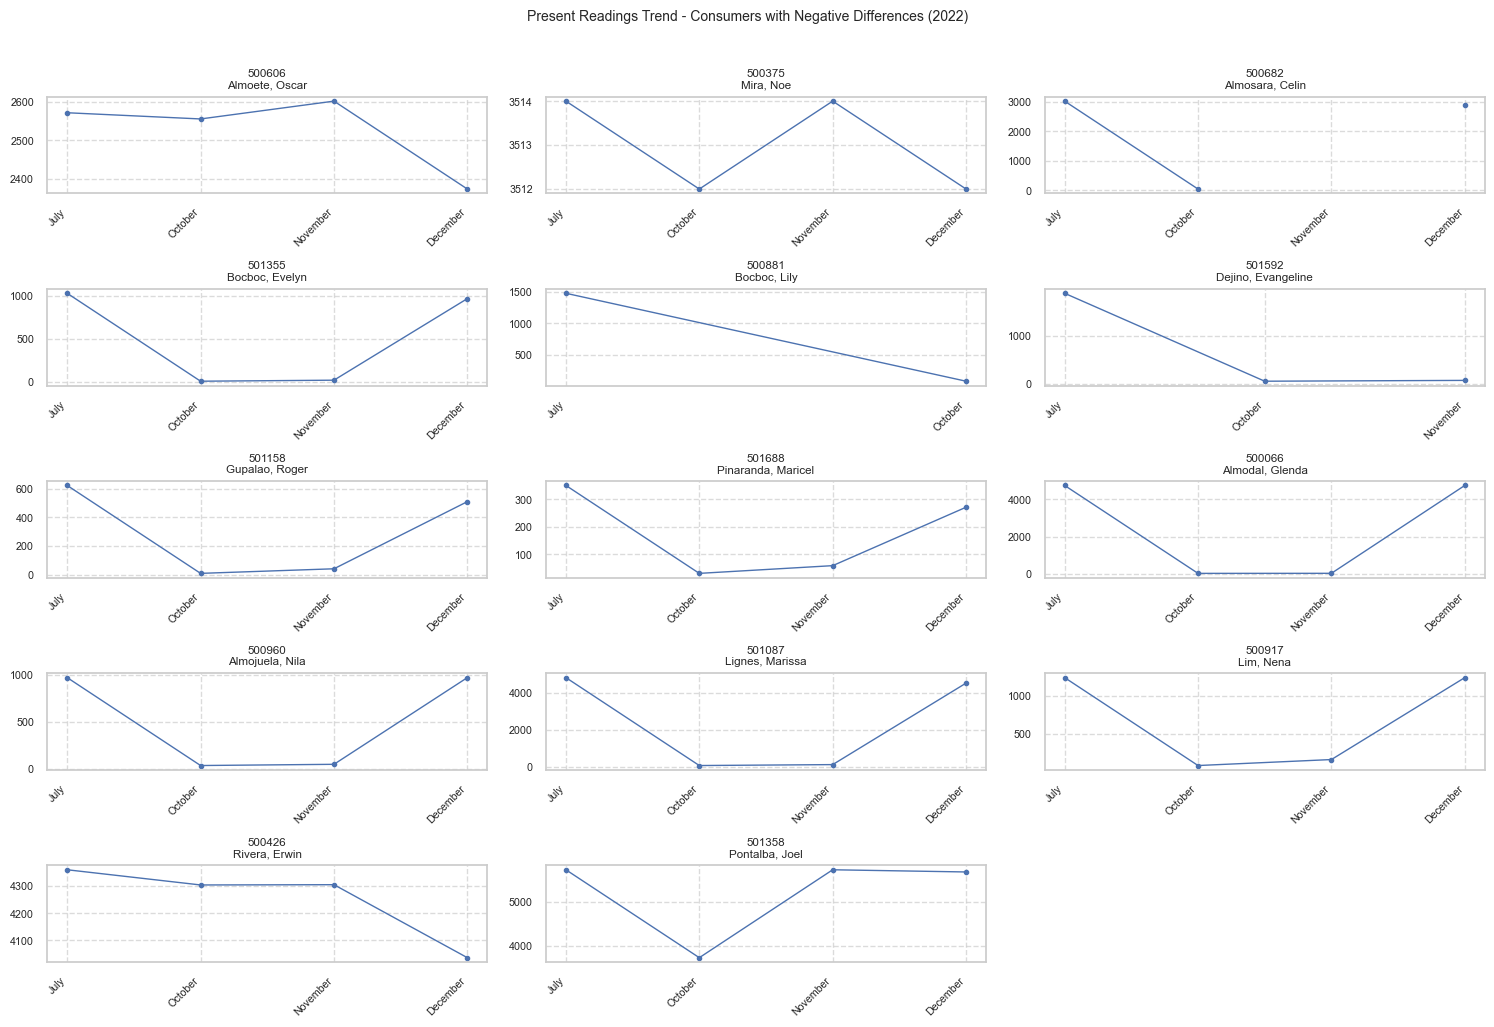

Total consumers with negative difference: 14


In [93]:
# Set up the plotting style
sns.set(style="whitegrid", font_scale=0.7)
plt.rcParams['figure.dpi'] = 100  # Smaller figure size

# Prepare data for plotting
months = ['July', 'October', 'November', 'December']
month_cols = ['Present_july', 'Present_oct', 'Present_nov', 'Present_dec']

# Create a figure with subplots for each consumer with negative difference
n_consumers = len(negative_df)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_consumers + n_cols - 1) // n_cols  # Calculate needed rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2*n_rows))
fig.suptitle('Present Readings Trend - Consumers with Negative Differences (2022)', y=1.02)

# Flatten axes if only one row
if n_rows == 1:
    axes = axes.reshape(1, -1)

for idx, (_, row) in enumerate(negative_df.iterrows()):
    ax = axes[idx//n_cols, idx%n_cols] if n_rows > 1 else axes[idx%n_cols]
    
    # Get readings for all months
    readings = [row[col] for col in month_cols]
    
    # Plot the line
    ax.plot(months, readings, 'o-', linewidth=1, markersize=3)
    
    # Add consumer info as title
    consumer_name = row["Consumer's Name"][:20] + '...' if len(row["Consumer's Name"]) > 20 else row["Consumer's Name"]
    ax.set_title(f"{row['Control Number']}\n{consumer_name}")
    
    # Format y-axis to avoid scientific notation
    ax.ticklabel_format(style='plain', axis='y')
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)

# Hide any empty subplots
for idx in range(n_consumers, n_rows * n_cols):
    ax = axes[idx//n_cols, idx%n_cols] if n_rows > 1 else axes[idx%n_cols]
    ax.axis('off')

plt.tight_layout()
plt.show()

# Print summary
print(f"Total consumers with negative difference: {len(negative_df)}")

# Order of Address

In [17]:
import pandas as pd

compiled_df = None

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
year = "2020"

for month in months:
    compiled_df = pd.concat([compiled_df, pd.read_csv(f"../../dataset/raw/{year}/{month}{year}.csv", encoding='latin-1')], ignore_index=True)

unique_address = compiled_df['Address'].unique()

print("\t Unique Address:")
print("\t-----------------")
for address in unique_address:
    print('\t', address)

print("\t-----------------")


	 Unique Address:
	-----------------
	 Alicante St.
	 Almonte St.
	 Altarejos St.
	 Amican St.
	 Bailon St.
	 Balcavem St.
	 Balintong St.
	 Barsaga St.
	 Bartolabac St.
	 Bartolabac St. 1
	 Bartolay St.
	 Don Juan St.
	 Esparrago St.
	 Espinosa St.
	 Fabmar St.
	 Flores St.
	 Grafilo St.
	 Gutierrez St.
	 Jones St.
	 Letada St.
	 Lique St.
	 Moyot St.
	 Villamor St.
	 Puro, Calipat-an
	-----------------
